## Color Segmentation with K-means Clustering

In [1]:
from matplotlib import pyplot as plt
import cv2
%matplotlib inline
import pandas as pd
import numpy as np

(-0.5, 1919.5, 1079.5, -0.5)

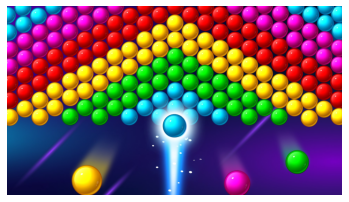

In [320]:
img = cv2.imread('hd.jpeg',cv2.IMREAD_UNCHANGED)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 1919.5, 1079.5, -0.5)

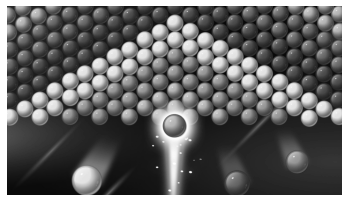

In [322]:
## Convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap = "gray")
plt.axis('off')

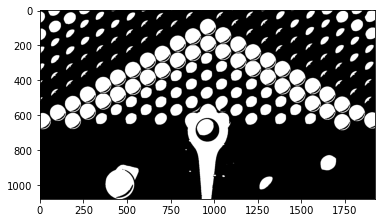

In [326]:
## Apply Binary Thresholding and Erosion
mask = cv2.threshold(gray,150,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
## Erode Image
mask = cv2.erode(mask,np.ones((3,3),np.uint8))
plt.imshow(mask,cmap='gray')

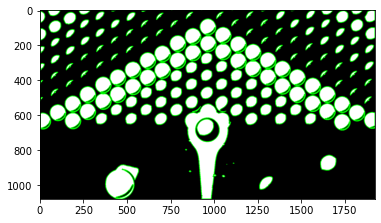

In [327]:
## Find and Display Contours
contours1, hierarchy1 = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image = mask.copy()
image = cv2.cvtColor(image,cv2.COLOR_GRAY2BGR)
cv2.drawContours(image,contours1,-1, (0, 255, 0), 3)
plt.imshow(image)

In [328]:
## Filtering Contours and extracting mean colors
f_c = []
df_m_c = pd.DataFrame()
for idx, contour in enumerate (contours1):
    area = int(cv2.contourArea(contour))
    #if Area is higher than 
    if area >1000  :
        f_c.append(contour)
        masked=np.zeros_like(img[:,:,0])
        cv2.drawContours(masked,[contour],0,255,-1)
        
        B_mean,G_mean,R_mean,_ = cv2.mean(img, mask=masked)
        df=pd.DataFrame({'B_mean':B_mean,'G_mean':G_mean,'R_mean':R_mean},index = {idx})
        df_m_c =pd.concat([df_m_c,df])
df_m_c.head()

,B_mean,G_mean,R_mean
0,247.828090,52.901966,253.687921
3,25.954815,178.002372,214.855224
4,1.657525,102.997187,172.924754
9,28.825446,238.539060,28.821232
11,17.951506,190.092470,231.059488


(-0.5, 1919.5, 1079.5, -0.5)

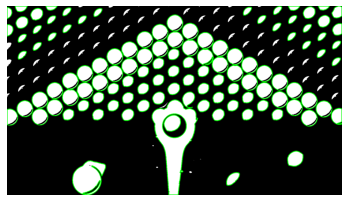

In [329]:
## Displaying contours of extracted colors
## Filteration
image2=mask.copy()
image2 = cv2.cvtColor(image2,cv2.COLOR_GRAY2BGR)
cv2.drawContours(image2,tuple(f_c),-1,(0,255,0),3)
plt.imshow(image2)
plt.axis('off')

In [330]:
## K means Clustering
from sklearn.cluster import KMeans
km=KMeans (n_clusters=5)
df_m_c['label'] = km.fit_predict(df_m_c)

In [331]:
def draw_segmented_objects(image,contours,label_cnt_idx,count):
    mask=np.zeros_like(image[:,:,0])
    cv2.drawContours(mask,[contours[i]for i in label_cnt_idx],-1,(255),-1)
    masked_image = cv2.bitwise_and(image,image,mask=mask)
    masked_image =cv2.putText(masked_image,f'{count} bubbles',(200,1200),cv2.FONT_HERSHEY_SIMPLEX,
                              fontScale= 3,color = (255,255,255),thickness=10,lineType = cv2.LINE_AA)
    return masked_image

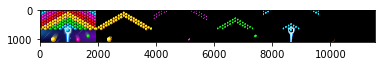

In [332]:
img1 = img.copy()
for label,df_grouped in df_m_c.groupby('label'):
    count = len(df_grouped)
    masked_image=draw_segmented_objects(img,contours1,df_grouped.index,count)
    img1 = cv2.hconcat([img1,masked_image])
    
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))